# Sample solutions for Exercise 5

Course: Scientific Programming (Python) by Bálint Aradi, University of Bremen

In [1]:
%matplotlib inline

In [2]:
import os.path
import numpy as np
import matplotlib.pyplot as plt

## Visualizing QM results

In [3]:
def read_qm_result(directory):
    """Reads in the data of a QM-calculation.
    
    Args:
        directory: Directory containing the files with the QM-calculation details.
            (energies.dat, discrpot.dat, wfuncs.dat)
    
    Returns:
        Tuple (energies, xx, potential, wavefuncs) with the eigenenergies,
        x-grid, potential values on the grid, wavefunction values on the grid).
    """
    energies_dat = np.loadtxt(os.path.join(directory, 'energies.dat'))
    discrpot_dat = np.loadtxt(os.path.join(directory, 'discrpot.dat'))
    wfuncs_dat = np.loadtxt(os.path.join(directory, 'wfuncs.dat'))
    energies = energies_dat
    xx = discrpot_dat[:,0]
    potential = discrpot_dat[:,1]
    wavefuncs = wfuncs_dat[:,1:]
    
    return energies, xx, potential, wavefuncs

In [4]:
def plot_qm_result(name, energies, xx, potential, wavefuncs, prefactor=1.0, xlim=None, ylim=None):
    """Visualizes the results of a QM-calculation (1D, one-particle, non-relativistic).
    
    It plots the electron potential and the eigenstates shifted with their corresponding eigenenergies.
    
    Args:
        name: Name of the system (for plot title)
        energies: Calculated eigenenergies
        xx: X-values of the 1D-grid, on wich potential and wavefunctions are represented.
        potential: Potential values on the grid.
        wavefuncs: Wave functions values on the grid.
        prefactor: Scaling factor for the wave functions (default: 1.0)
        xlim: Minimal and maximal x-values to show (default: actual plt.xlim values)
        ylim: Minimal and maximal y-values to show (default: actual plt.ylim values)
    """
    
    if xlim is None:
        xmin, xmax = plt.xlim()
    else:
        xmin, xmax = xlim
        plt.xlim(xmin, xmax)
    
    if ylim is None:
        ymin, ymax = plt.ylim()
    else:
        ymin, ymax = ylim
        plt.ylim(ymin, ymax)
        
    plt.title(name, fontsize=14)
    plt.xlabel("x [Bohr]", fontsize=14)
    plt.ylabel("Energy [Hartree]", fontsize=14)
    
    plt.plot(xx, potential, linewidth=1.5, linestyle="-", color="black")
    
    for ienerg in range(len(energies)):
        energy = energies[ienerg]
        wavefunc = wavefuncs[:, ienerg]
        if ienerg % 2:
            color = "blue"
        else:
            color = "red"
        plt.plot([xmin, xmax], [energy, energy], linewidth=0.5, linestyle="-", color='grey')
        plt.plot(xx, prefactor * wavefunc + energy, linewidth=1.0, linestyle="-", color=color)
   
    ax = plt.gca()
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(14)

### Harmonic oscillator

In [6]:
energies, xx, potential, wavefuncs = read_qm_result("schroedinger/harmonic")

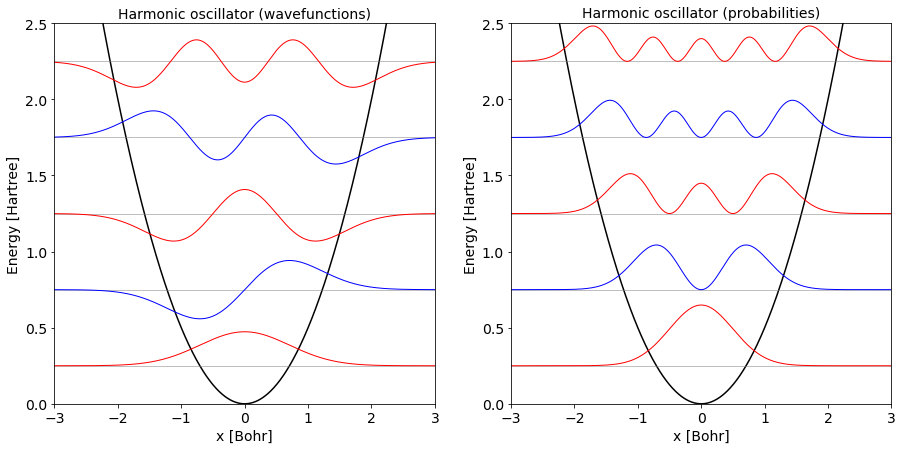

In [7]:
plt.figure(figsize=(15, 7))
xlim = -3.0, 3.0
ylim = 0.0, 2.5
plt.subplot(1, 2, 1)
plot_qm_result("Harmonic oscillator (wavefunctions)", energies, xx, potential, wavefuncs,
               prefactor=2.5, xlim=xlim, ylim=ylim)
plt.subplot(1, 2, 2)
plot_qm_result("Harmonic oscillator (probabilities)", energies, xx, potential, np.abs(wavefuncs)**2,
               prefactor=50, xlim=xlim, ylim=ylim)
plt.show()

### Double well

In [8]:
energies, xx, potential, wavefuncs = read_qm_result("schroedinger/double_well")

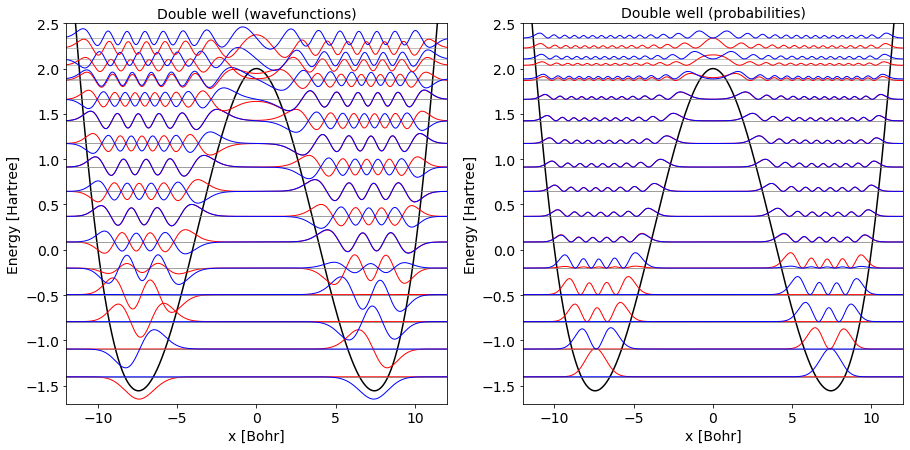

In [9]:
plt.figure(figsize=(15, 7))
xlim = -12.0, 12.0
ylim = -1.7, 2.5
plt.subplot(1, 2, 1)
plot_qm_result("Double well (wavefunctions)", energies, xx, potential, wavefuncs,
               prefactor=2.2, xlim=xlim, ylim=ylim)
plt.subplot(1, 2, 2)
plot_qm_result("Double well (probabilities)", energies, xx, potential, np.abs(wavefuncs)**2,
               prefactor=25, xlim=xlim, ylim=ylim)
plt.show()

### Infinite well

In [10]:
energies, xx, potential, wavefuncs = read_qm_result("schroedinger/inf_well")

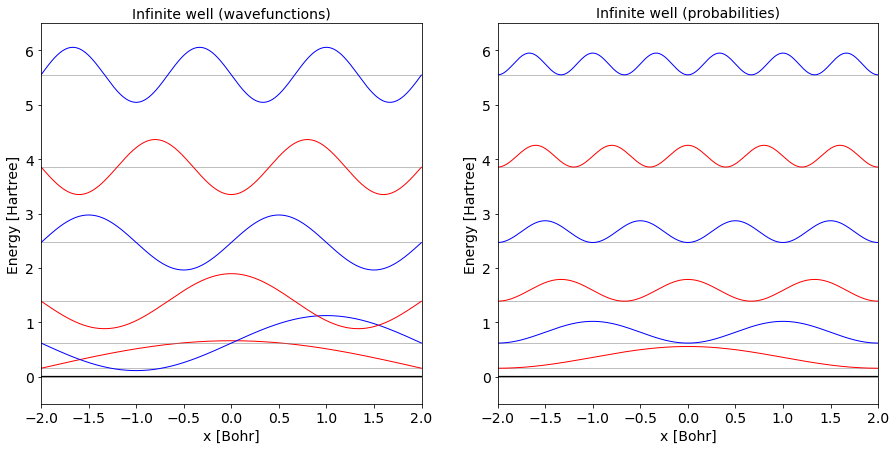

In [11]:
plt.figure(figsize=(15, 7))
xlim = -2.0, 2.0
ylim = -0.5, 6.5
plt.subplot(1, 2, 1)
plot_qm_result("Infinite well (wavefunctions)", energies, xx, potential, wavefuncs,
               prefactor=16.0, xlim=xlim, ylim=ylim)
plt.subplot(1, 2, 2)
plot_qm_result("Infinite well (probabilities)", energies, xx, potential, np.abs(wavefuncs)**2,
               prefactor=400, xlim=xlim, ylim=ylim)
plt.show()